# EDSA - Climate Change Belief Analysis 2022

© Explore Data Science Academy

---
### Honour Code

We as Team *2201FTDS_GM4* consisting of {**Alette Baloyi, Nkoka Khosa, Precious Montsha, Mahlatse Philix Ramabopa, Roger Arendse, and Wezo Ntsokota**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Pipeline Developement</a>

<a href=#nine>9. Preparing the test data and submission file </a>

<a href=#ten>10. Final Thoughts and reccomendations</a>



## Data Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between **Apr 27, 2015 and Feb 21, 2018.** In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [44]:

# Importing modules
import nltk
#import 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Regular expression
import re

# to make bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC  
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import resample

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')
# Magic function to enable graphs and plots to be plotted below the cell where your plotting commands are written
%matplotlib inline

# Set plot style
sns.set()


In [45]:

# Downloading the 'tokenize' and 'stopwords'
#nltk.download()


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [46]:

#This is our training data for the model 
df_train = pd.read_csv("train.csv")


In [47]:
train = df_train.copy()


In [48]:

#This is our testing data for the model 
df_test = pd.read_csv("test.csv")


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [49]:

# Viewing the first 5 observations of the train data
df_train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [50]:

# Viewing the last 5 observations of the train data
df_train.tail()


,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [51]:

# Viewing the first 5 observations of our test data
df_test.head()


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [52]:

# Viewing the last 5 observations of our test data
df_test.tail()


,message,tweetid
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455
10545,RT @chloebalaoing: climate change is a global ...,470892


In [53]:

# Checking the data types of all the columns we have in our data
df_train.dtypes


sentiment     int64
message      object
tweetid       int64
dtype: object

In [54]:

# Checking the data types of all the columns we have in our test data
df_test.dtypes


message    object
tweetid     int64
dtype: object

In [55]:

# Viewing the dimension or the size of our train DataFrame
df_train.shape


(15819, 3)

In [56]:

# Viewing the dimension or the size of our test DataFrame
df_test.shape


(10546, 2)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


### 3.1 Looking at Data Statistics

In [58]:

# Looking into our 'df_train' to check for missing values 
df_train.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [59]:

# Printing the information of our 'df_train' using the 'info()' method
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [60]:

# Print off a list of all sentiment classes present in this dataset.
class_labels = list(df_train.sentiment.unique())
print(class_labels)


[1, 2, 0, -1]


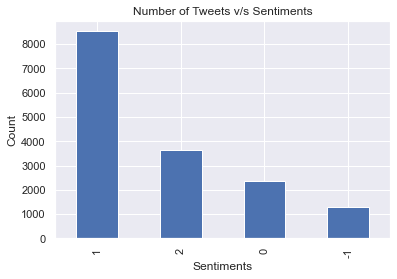

In [61]:

# Plotting the bar graph to see the distrinution of our 'df_train' sentiment.
labels = ['1', '2','0','-1']
bargraph = df_train["sentiment"].value_counts()
bargraph.plot(kind = "bar", title = "Number of Tweets v/s Sentiments", xlabel = "Sentiments", ylabel = "Count")
plt.show()


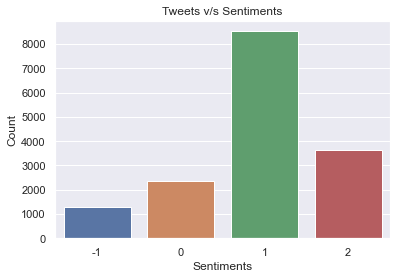

In [62]:

# Plotting the bar graph to see the distrinution of our 'df_train' sentiment with our classses arragend.
sns.barplot(x = bargraph.index, y = bargraph, data = df_train).set_title("Tweets v/s Sentiments")
plt.ylabel("Count")
plt.xlabel("Sentiments")
plt.show()


#### shape


In [73]:
df_train.info

<bound method DataFrame.info of        sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

       

### Wordcloud for Sentiment : 1 

- Making all text lowercase

In [22]:

df_train.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [23]:

df_train.tail()


,sentiment,message,tweetid
15814,1,rt ezlusztig they took down the material on gl...,22001
15815,2,rt washingtonpost how climate change could be ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt sara8smiles hey liberals the climate change...,819732
15818,0,rt chetcannon kurteichenwalds climate change e...,806319


#### 3.2.2 Tokenisation

#### 3.2.3 Lemmatization


#### 3.2.4 Stop Words

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1. 


### 5.2. Splitting the dataset

### 5.3 Model fitting

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="eight"></a>
## 8.Pipeline Developement & Model Tuning 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="nine"></a>
## 9. Preparing the test data and submission file
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [36]:

# Making the tweetid to be the index.

df_test = df_test.set_index('tweetid')


In [37]:

# Having a look at the first five rows of our test data
df_test.head()


,message
tweetid,
169760,Europe will now be looking to China to make su...
35326,Combine this with the polling of staffers re c...
224985,"The scary, unimpeachable evidence that climate..."
476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...


In [38]:

# Having a look at the last five rows of our test data
df_test.tail()


,message
tweetid,
895714,"RT @BrittanyBohrer: Brb, writing a poem about ..."
875167,2016: the year climate change came home: Durin...
78329,RT @loop_vanuatu: Pacific countries positive a...
867455,"RT @xanria_00018: You’re so hot, you must be t..."
470892,RT @chloebalaoing: climate change is a global ...


In [39]:

# Selecting the index of the test dataframe.
final_test = df_test.index


In [40]:

# Creating the submission Dataframe.
# Final_Table = {'tweetid': final_test, 'sentiment':np.round(lr_predictor, 0)}
# submission = pd.DataFrame(data = Final_Table)
# submission = submission[['tweetid', 'sentiment']]

# submission = pd.DataFrame(data = {'tweetid': df_test['tweetid'], 'sentiment': lr_predictor.astype('int')})
test = df_test['message']
testVec = betterVect.fit_transform(test)

# test_scaled = scaler.fit_transform(testVec)
y_pred = lr.predict(testVec) 

final_table = {'tweetid': df_test['tweetid'], 'sentiment': y_pred}
submission = pd.DataFrame(data = final_table)

submission[['tweetid','sentiment']].to_csv('2201DS_GM4_Submission.csv', index = False)


ValueError: X has 6910 features per sample; expecting 9057

In [ ]:

df_test = pd.read_csv("test.csv")


NameError: name 'pd' is not defined

In [ ]:

# To be adjusted.........Change the code 

final_test = df_test['message']
testVec = betterVect.transform(final_test)

y_prediction = lr.predict(testVec)

df_test['sentiment'] = y_prediction

df_test[['tweetid','sentiment']].to_csv('submission.csv', index = False)


NameError: name 'df_test' is not defined

In [ ]:

submission.set_index('tweetid').head()


NameError: name 'submission' is not defined

In [ ]:

submission.set_index('tweetid').tail()


In [ ]:

# Converting to csv file
submission.to_csv("2201DS_GM4_Submission.csv",index  = False)


<a id="ten"></a>
## 10. Final Thoughts and reccomendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
